# NBaIoT SOM+Algos CLASSIFY

## Device 2

- Training on device 2 (using both Mirai and Gafgyt).
- Testing on device 2 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 12:31:54.979396: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 2

In [8]:
train_index

2

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((13113, 115), (13113,)),
 ((310630, 115), (310630,)),
 ((512133, 115), (512133,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((9179, 115), (3934, 115), (9179,), (3934,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((217441, 115), (93189, 115), (217441,), (93189,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((358493, 115), (153640, 115), (358493,), (153640,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

9179


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(9179, 115) (9179,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(18358, 115) (18358,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(9179, 115) (9179,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(18358, 115) (18358,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(97123, 115) (97123,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((3934, 115), (93189, 115), (3934,), (93189,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(157574, 115) (157574,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(110301, 115) (110301,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 3.45794855e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   3.81797403e-34  2.25198600e-17]
 [ 4.47850916e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -9.70281479e-02 -2.36053078e-01]
 [ 6.77613648e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -1.59362024e-01 -3.64757266e-01]
 ...
 [ 3.62804962e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -8.32440442e-02 -1.85465097e-01]
 [ 5.45194536e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -4.04594790e-02 -1.14390467e-01]
 [ 3.45794842e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -3.71231151e-02 -1.12811060e-01]]
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      3934
           2      1.000     0.999     0.999     93189

    accuracy                          0.999     97123
   macro avg      0.985     0.998     0.992     97123
weighted avg      0.999     0.999     0.999     97123



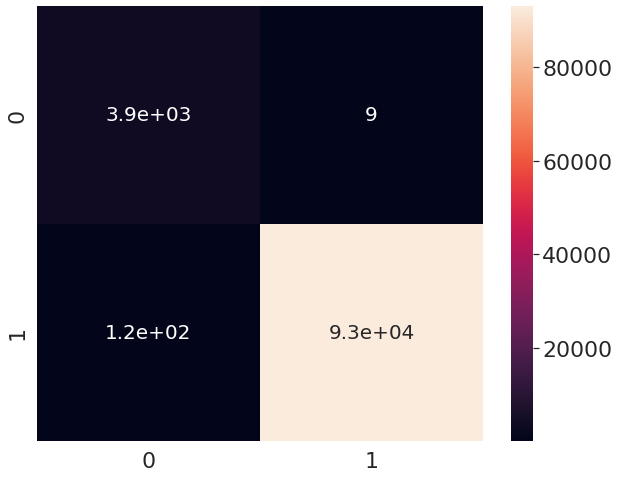

AUC score:  9.98217638705206e-01


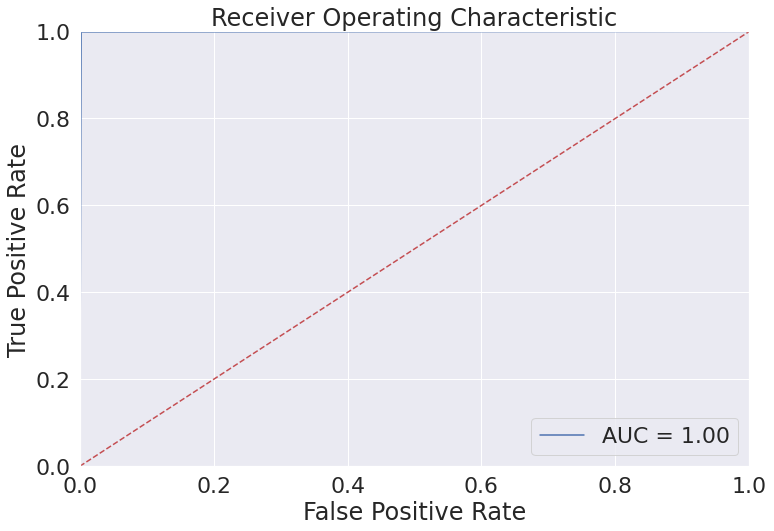

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.972     0.998     0.985      3934
           2      1.000     0.999     0.999     93189

    accuracy                          0.999     97123
   macro avg      0.986     0.998     0.992     97123
weighted avg      0.999     0.999     0.999     97123



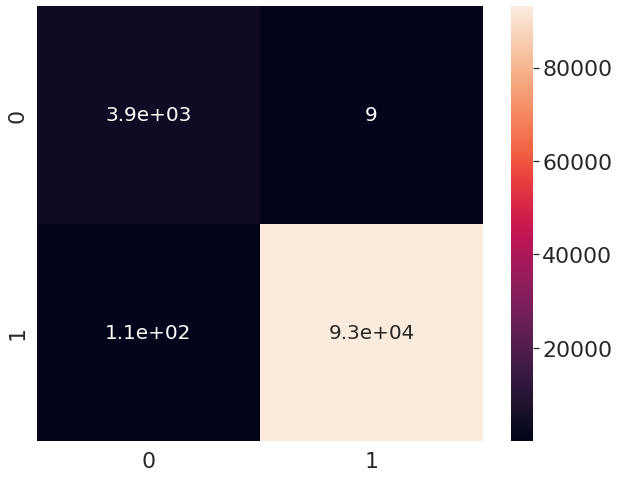

AUC score:  0.9982551967860954


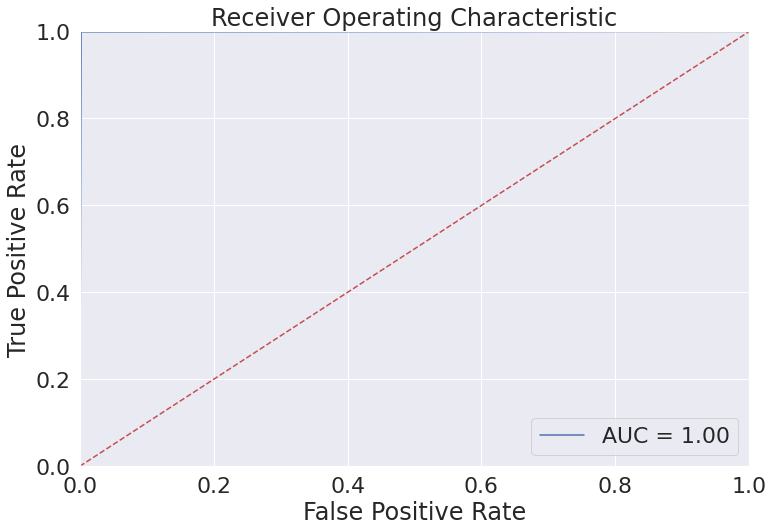

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      3934
           2      1.000     0.999     0.999     93189

    accuracy                          0.999     97123
   macro avg      0.985     0.998     0.992     97123
weighted avg      0.999     0.999     0.999     97123



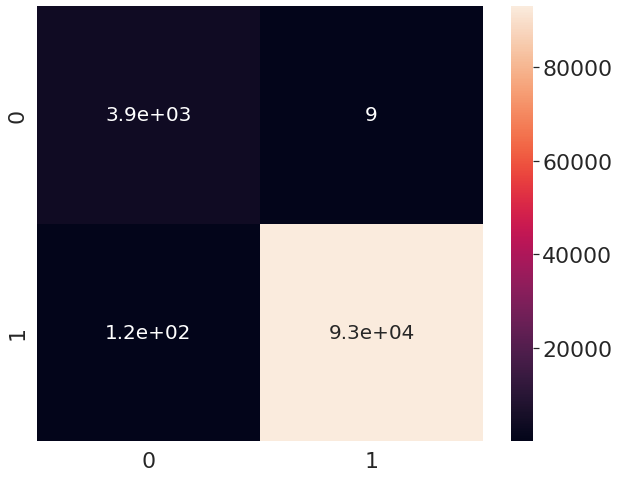

AUC score:  0.998217638705206


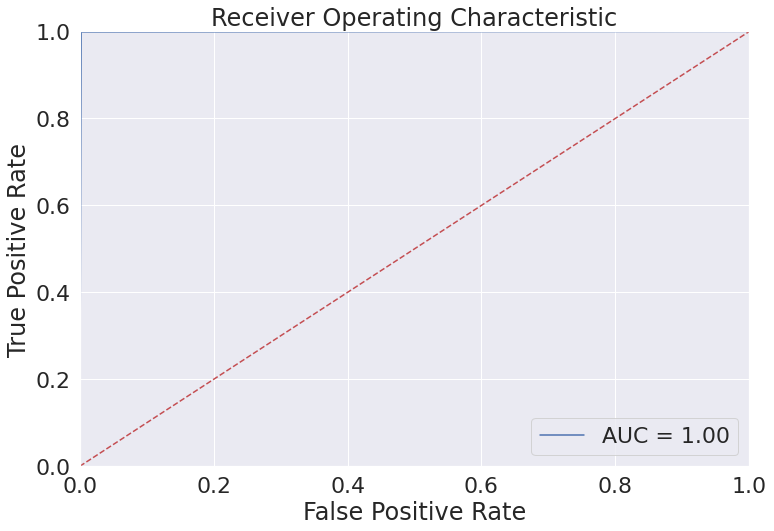

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      3934
           2      1.000     0.999     0.999     93189

    accuracy                          0.999     97123
   macro avg      0.985     0.998     0.992     97123
weighted avg      0.999     0.999     0.999     97123



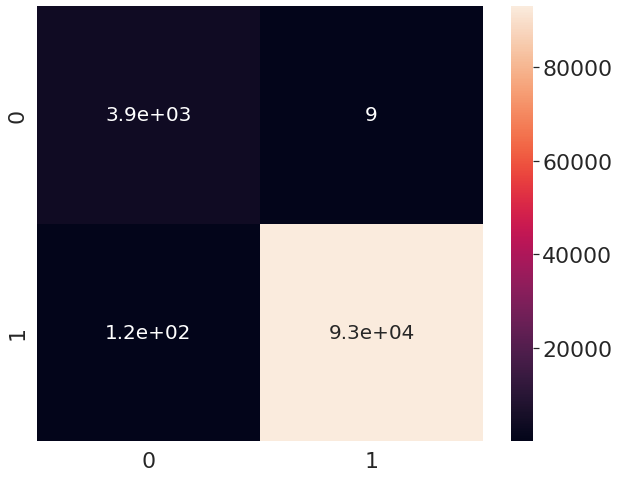

AUC score:  0.998217638705206


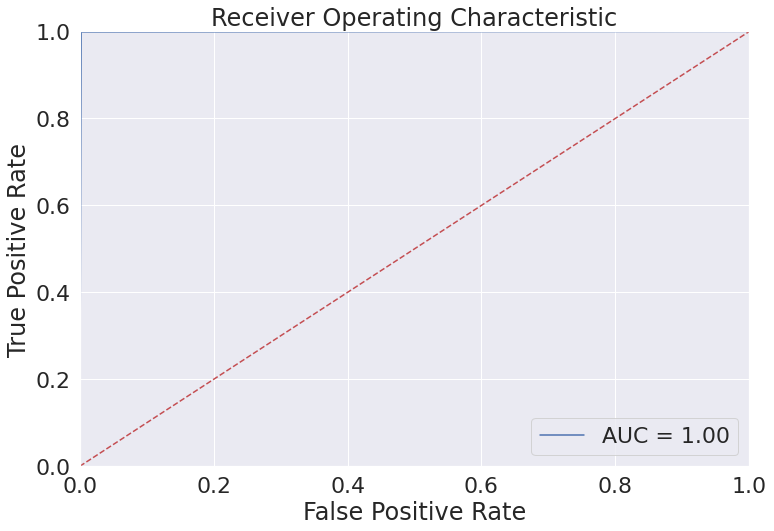

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      3934
           2      1.000     0.999     0.999     93189

    accuracy                          0.999     97123
   macro avg      0.985     0.998     0.992     97123
weighted avg      0.999     0.999     0.999     97123



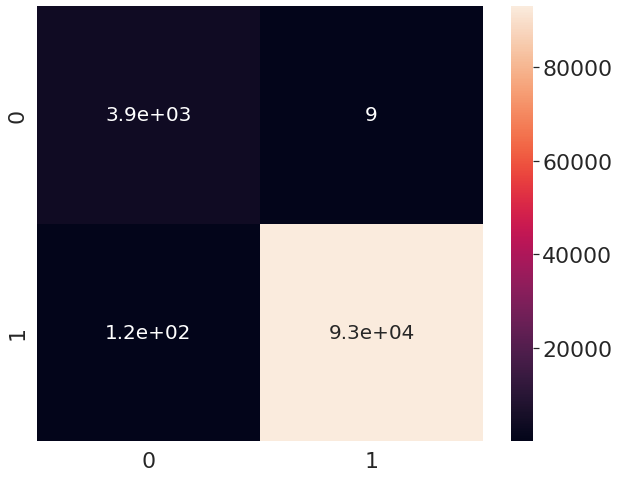

AUC score:  0.998217638705206


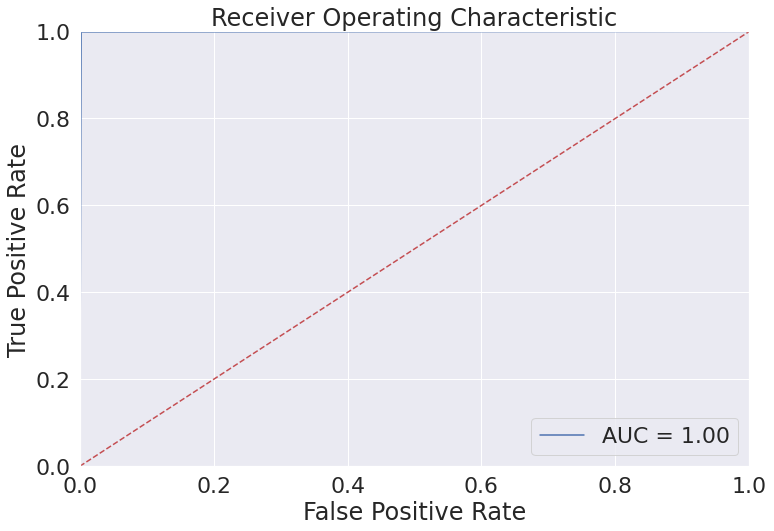

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.055     0.998     0.104      2723
           2      1.000     0.566     0.723    107578

    accuracy                          0.576    110301
   macro avg      0.527     0.782     0.413    110301
weighted avg      0.977     0.576     0.707    110301



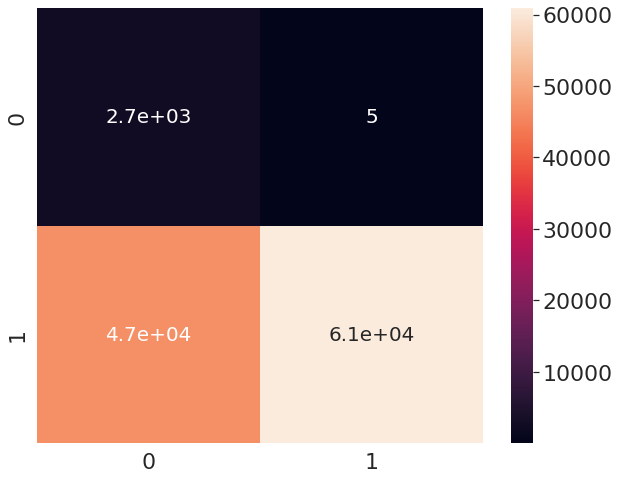

AUC score:  0.7819045910590631


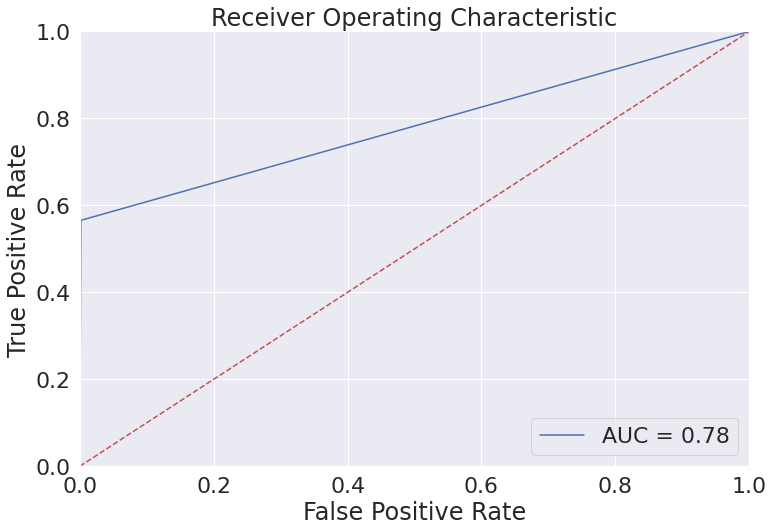

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.061     0.998     0.115      2723
           2      1.000     0.612     0.759    107578

    accuracy                          0.621    110301
   macro avg      0.531     0.805     0.437    110301
weighted avg      0.977     0.621     0.743    110301



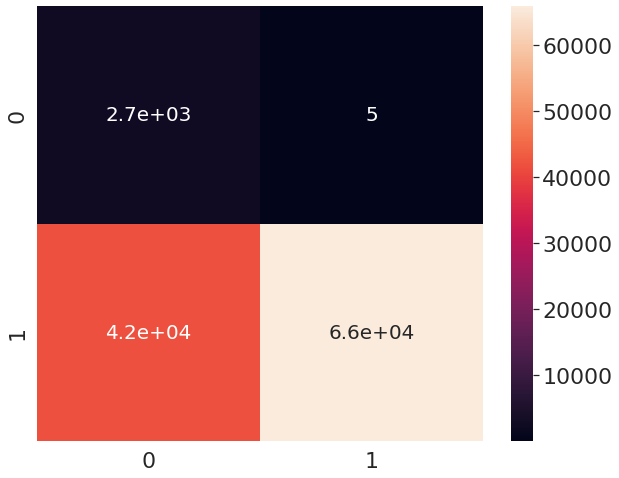

AUC score:  0.8050180529192946


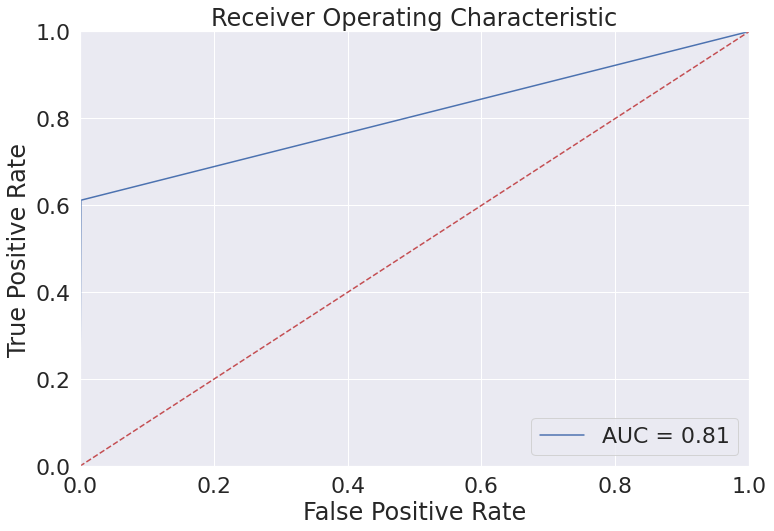

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.055     0.998     0.104      2723
           2      1.000     0.566     0.723    107578

    accuracy                          0.576    110301
   macro avg      0.527     0.782     0.413    110301
weighted avg      0.977     0.576     0.707    110301



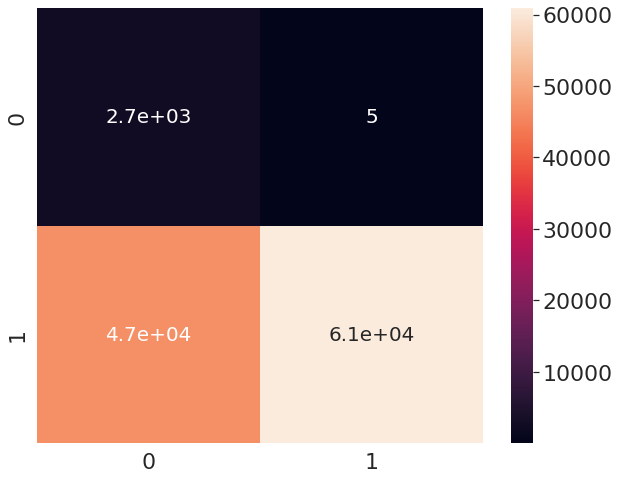

AUC score:  0.7819045910590631


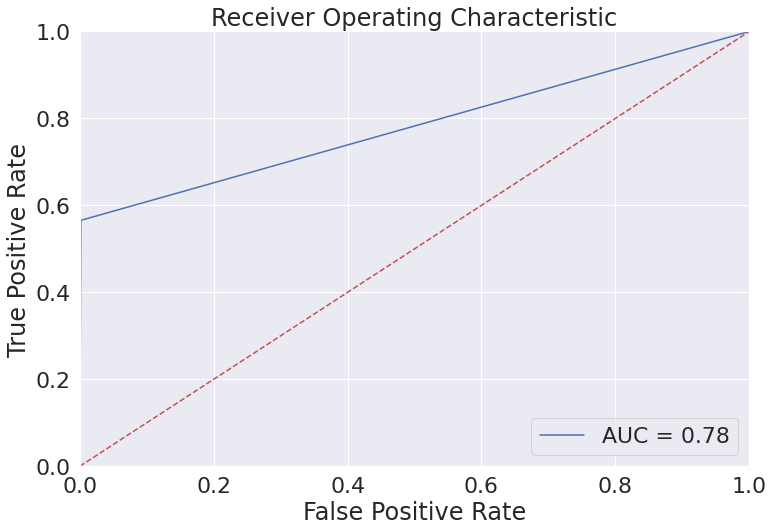

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.055     0.998     0.104      2723
           2      1.000     0.566     0.723    107578

    accuracy                          0.576    110301
   macro avg      0.527     0.782     0.413    110301
weighted avg      0.977     0.576     0.707    110301



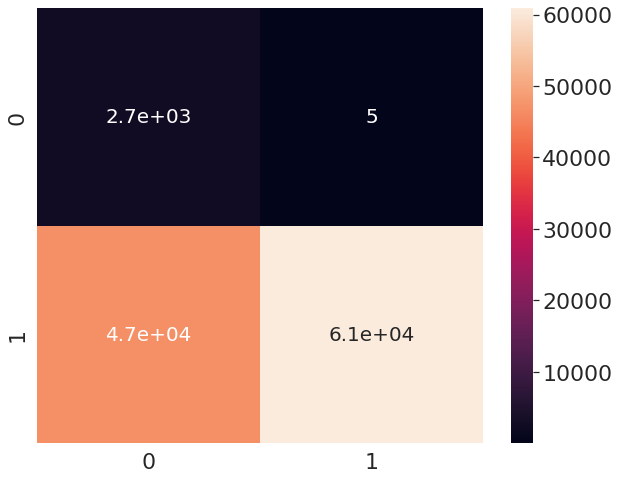

AUC score:  0.7819045910590631


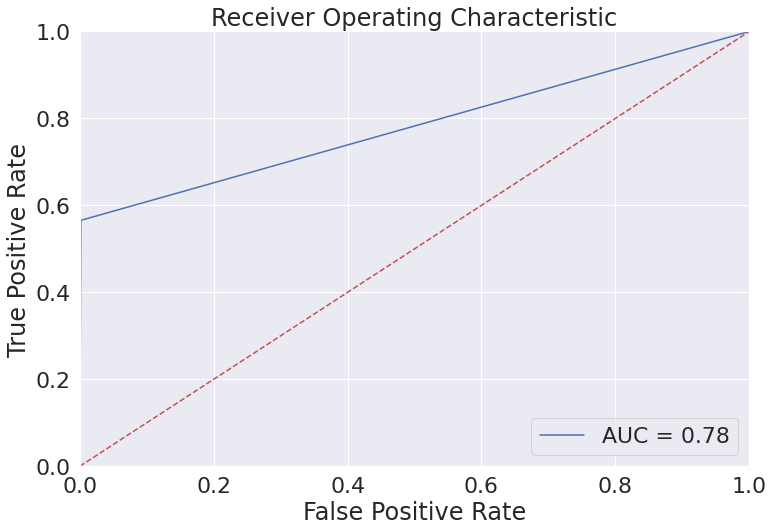

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.055     0.998     0.104      2723
           2      1.000     0.566     0.723    107578

    accuracy                          0.576    110301
   macro avg      0.527     0.782     0.413    110301
weighted avg      0.977     0.576     0.707    110301



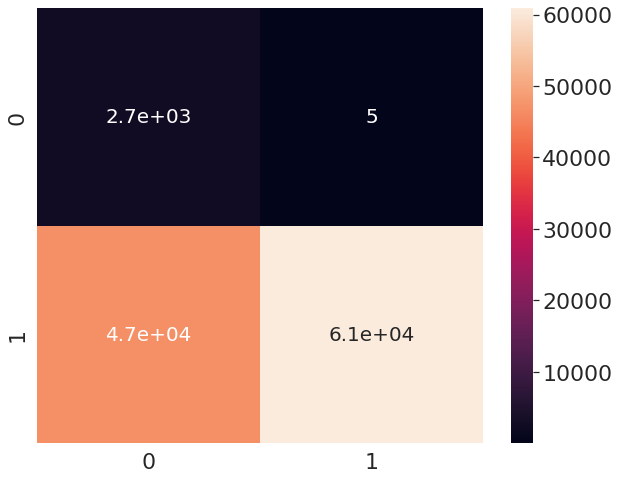

AUC score:  0.7819045910590631


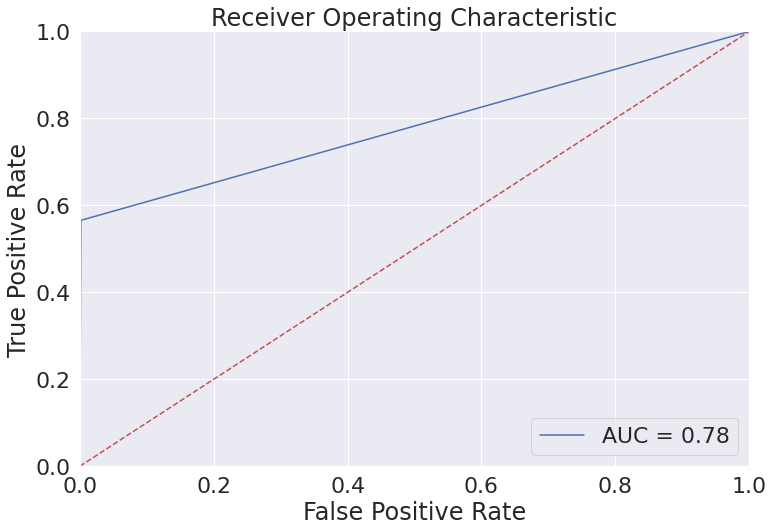

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(18358, 115) (18358,)
------------Scale data-----------------
(18358, 115) (18358,)
X_train_scaled
[[ 2.31515042e-03  5.41440555e-02  3.63262322e-09 ...  5.57415826e-18
   1.12256067e-33  4.99340799e-17]
 [ 2.99843163e-03  1.24129016e-01  6.37556170e-02 ...  1.27110049e-01
  -2.85282147e-01 -5.23408817e-01]
 [ 4.53672891e-03  6.51663165e-02  2.18698960e-04 ...  1.35988519e-01
  -4.68556201e-01 -8.08789153e-01]
 ...
 [ 2.42903573e-03  3.33851152e-01  1.05116699e-02 ...  1.47720813e-01
  -2.44754127e-01 -4.11238303e-01]
 [ 3.65016233e-03  2.84774544e-01  2.93300948e-02 ...  1.04072329e-01
  -1.18958954e-01 -2.53642017e-01]
 [ 2.31515033e-03  3.42912333e-01  0.00000000e+00 ...  9.75485625e-02
  -1.09149378e-01 -2.50139944e-01]]
---------Normalize data--------------
(18358, 115) (18358,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.873     0.998     0.932      3934
           2      1.000     0.994     0.997     93189

    accuracy                          0.994     97123
   macro avg      0.937     0.996     0.964     97123
weighted avg      0.995     0.994     0.994     97123



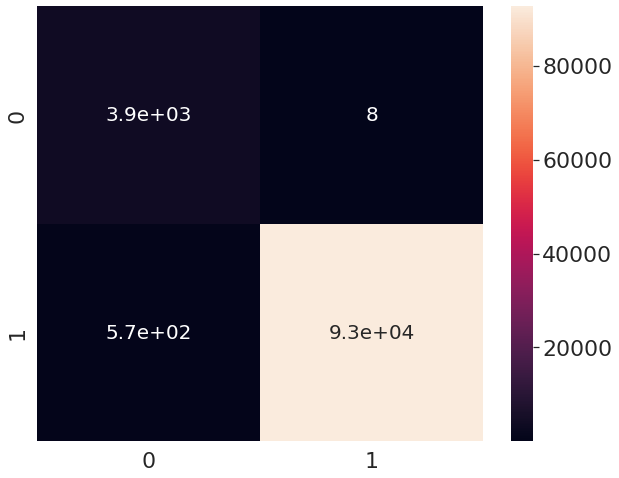

AUC score:  9.95930287750218e-01


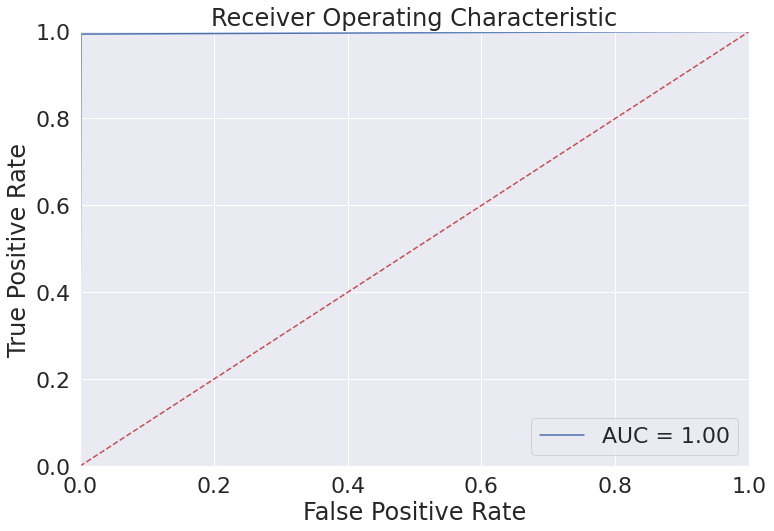

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.874     0.998     0.932      3934
           2      1.000     0.994     0.997     93189

    accuracy                          0.994     97123
   macro avg      0.937     0.996     0.964     97123
weighted avg      0.995     0.994     0.994     97123



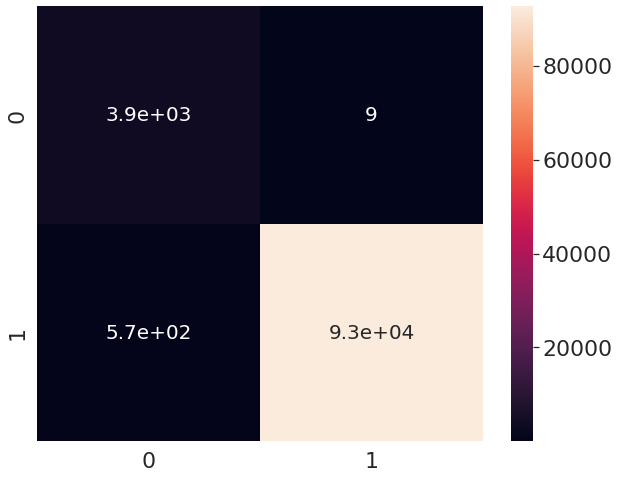

AUC score:  0.995819286968413


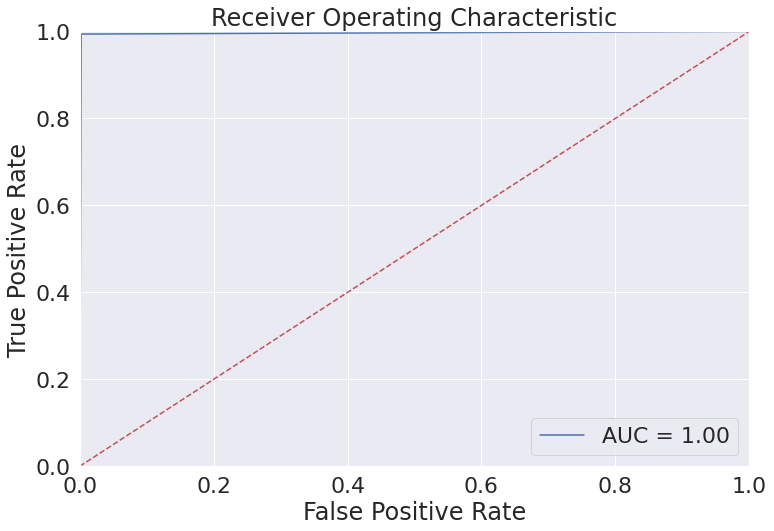

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.873     0.998     0.932      3934
           2      1.000     0.994     0.997     93189

    accuracy                          0.994     97123
   macro avg      0.937     0.996     0.964     97123
weighted avg      0.995     0.994     0.994     97123



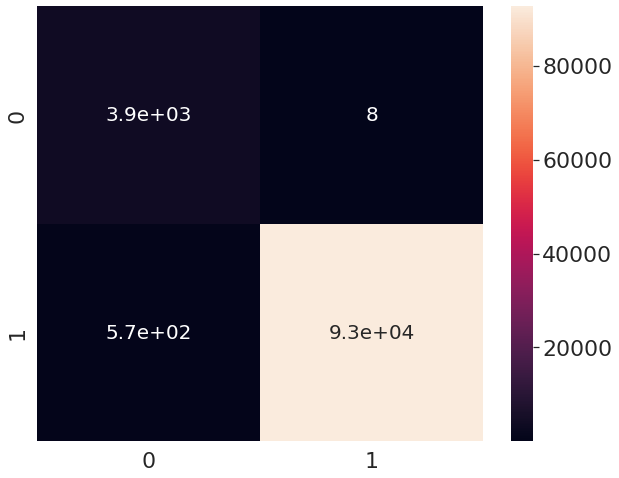

AUC score:  0.995930287750218


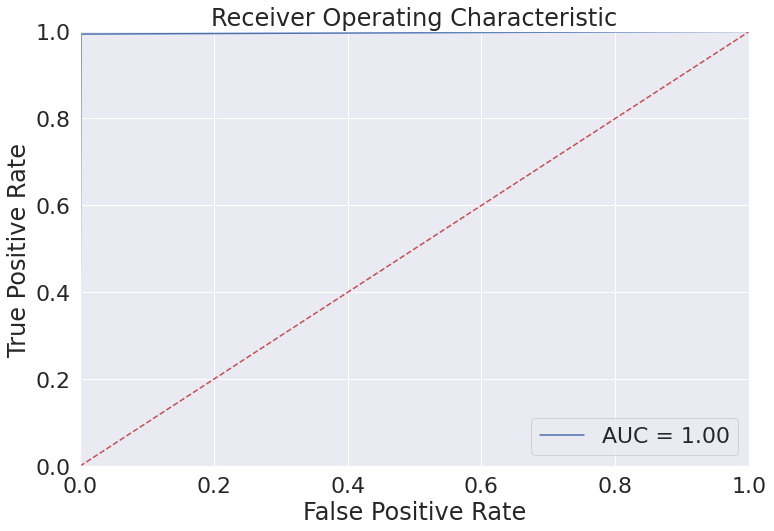

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.873     0.998     0.932      3934
           2      1.000     0.994     0.997     93189

    accuracy                          0.994     97123
   macro avg      0.937     0.996     0.964     97123
weighted avg      0.995     0.994     0.994     97123



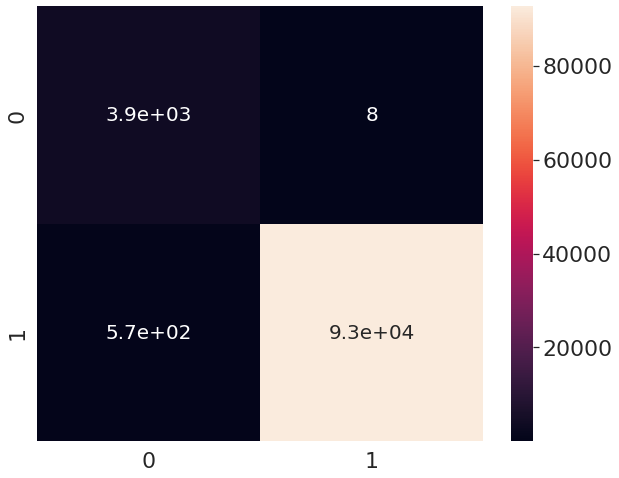

AUC score:  0.995930287750218


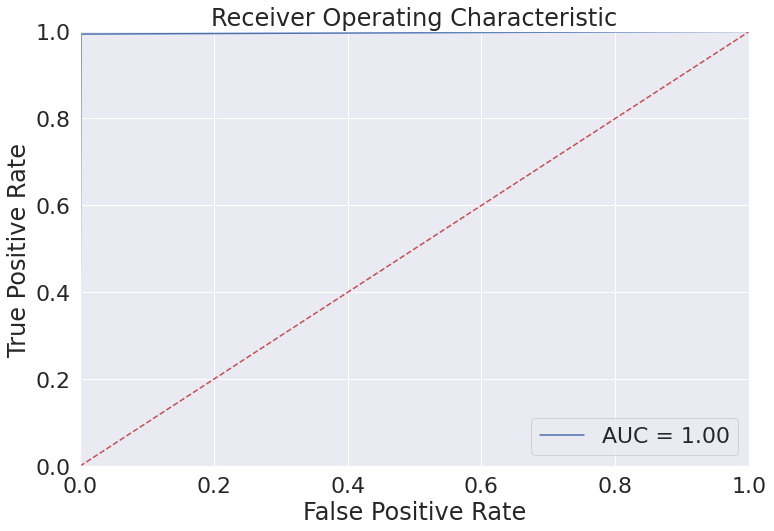

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (97123, 115) (97123,)
----------------------Test is starting----------------------
Scale data
Shape:  (97123, 115) (97123,)
Normalize data
Shape:  (97123, 115) (97123,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.873     0.998     0.932      3934
           2      1.000     0.994     0.997     93189

    accuracy                          0.994     97123
   macro avg      0.937     0.996     0.964     97123
weighted avg      0.995     0.994     0.994     97123



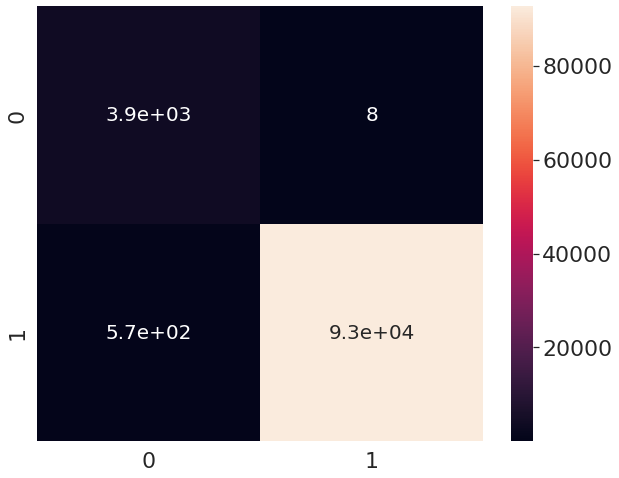

AUC score:  0.995930287750218


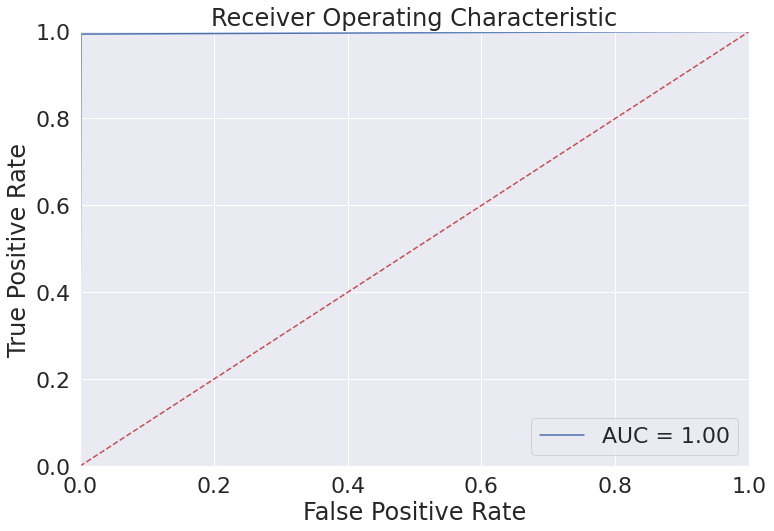

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.925     0.998     0.960      2723
           2      1.000     0.998     0.999    107578

    accuracy                          0.998    110301
   macro avg      0.963     0.998     0.980    110301
weighted avg      0.998     0.998     0.998    110301



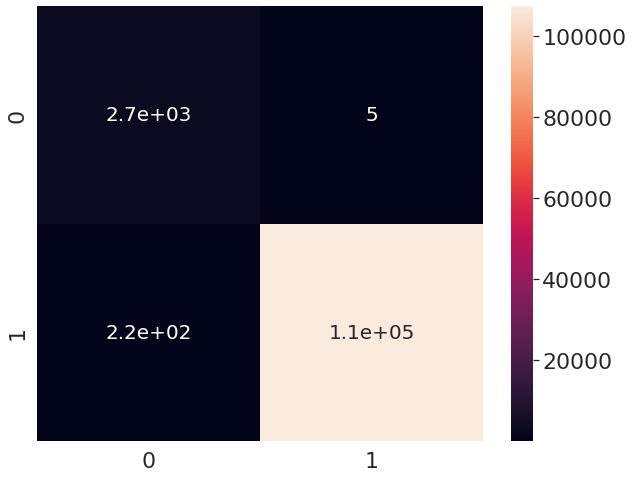

AUC score:  0.9980640288623314


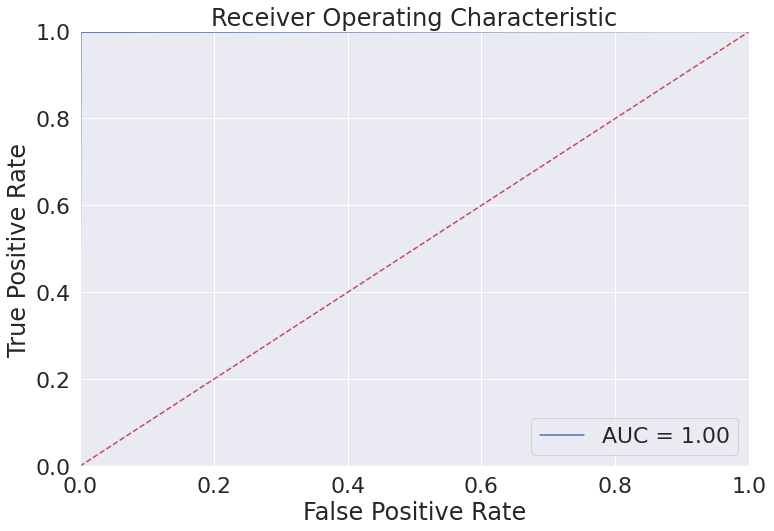

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.931     0.998     0.964      2723
           2      1.000     0.998     0.999    107578

    accuracy                          0.998    110301
   macro avg      0.966     0.998     0.981    110301
weighted avg      0.998     0.998     0.998    110301



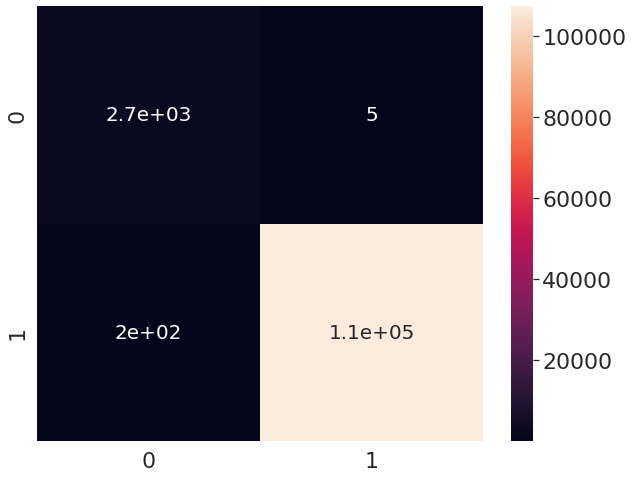

AUC score:  0.9981523368806995


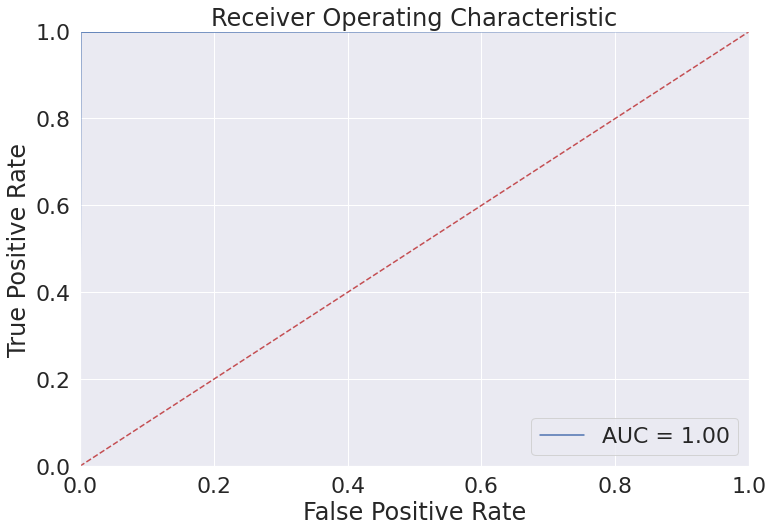

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.925     0.998     0.960      2723
           2      1.000     0.998     0.999    107578

    accuracy                          0.998    110301
   macro avg      0.963     0.998     0.980    110301
weighted avg      0.998     0.998     0.998    110301



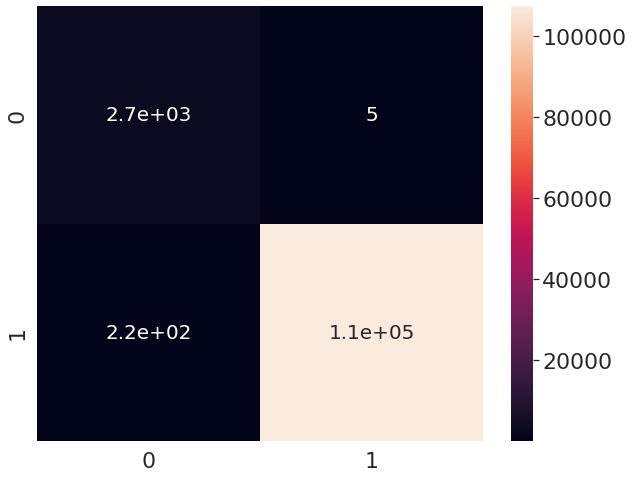

AUC score:  0.9980640288623314


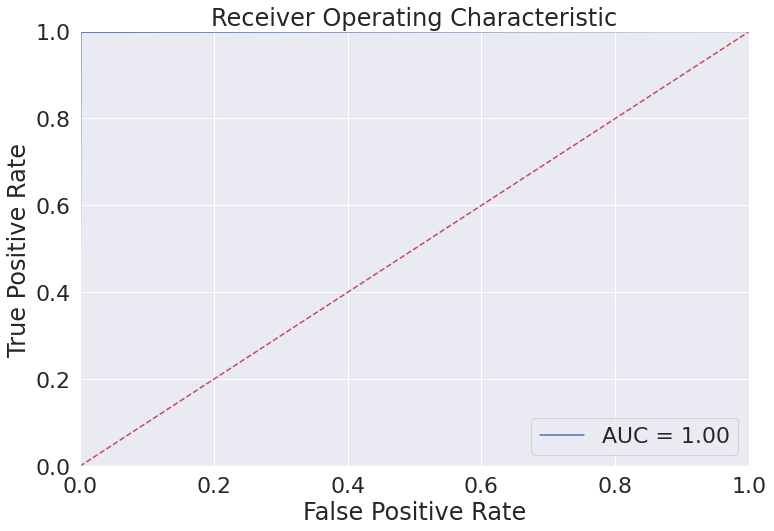

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.925     0.998     0.960      2723
           2      1.000     0.998     0.999    107578

    accuracy                          0.998    110301
   macro avg      0.963     0.998     0.980    110301
weighted avg      0.998     0.998     0.998    110301



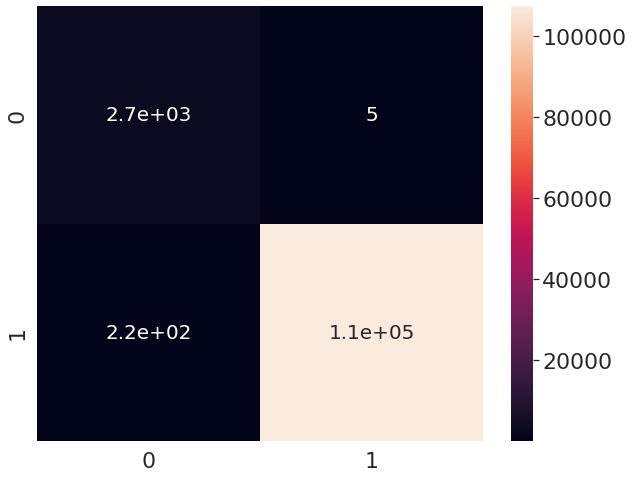

AUC score:  0.9980640288623314


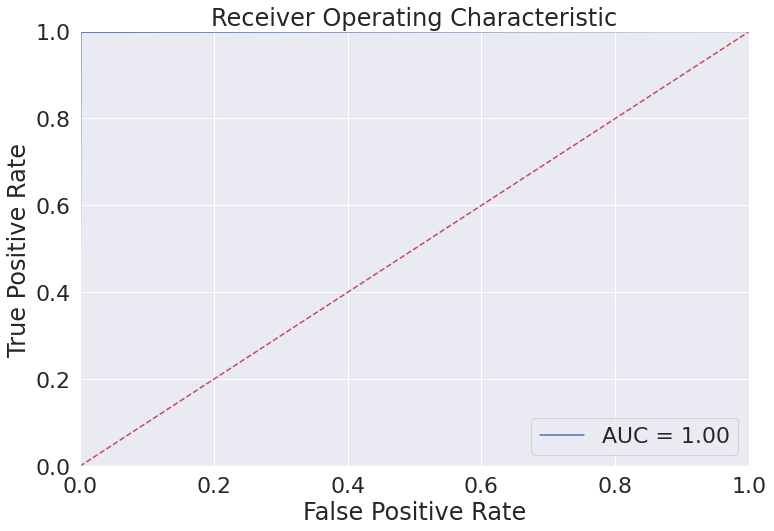

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (110301, 115) (110301,)
----------------------Test is starting----------------------
Scale data
Shape:  (110301, 115) (110301,)
Normalize data
Shape:  (110301, 115) (110301,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.925     0.998     0.960      2723
           2      1.000     0.998     0.999    107578

    accuracy                          0.998    110301
   macro avg      0.963     0.998     0.980    110301
weighted avg      0.998     0.998     0.998    110301



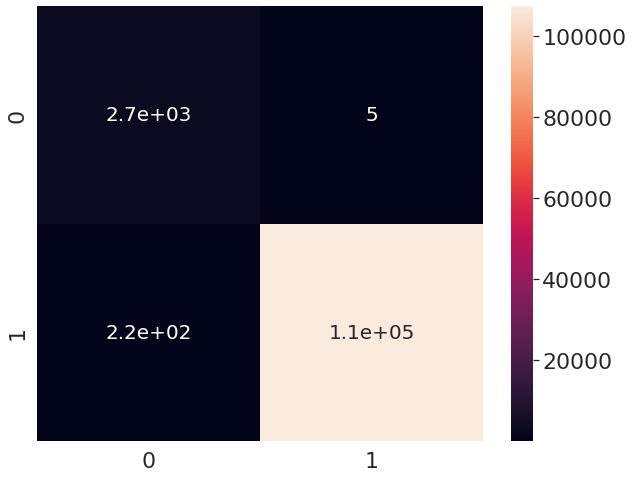

AUC score:  0.9980640288623314


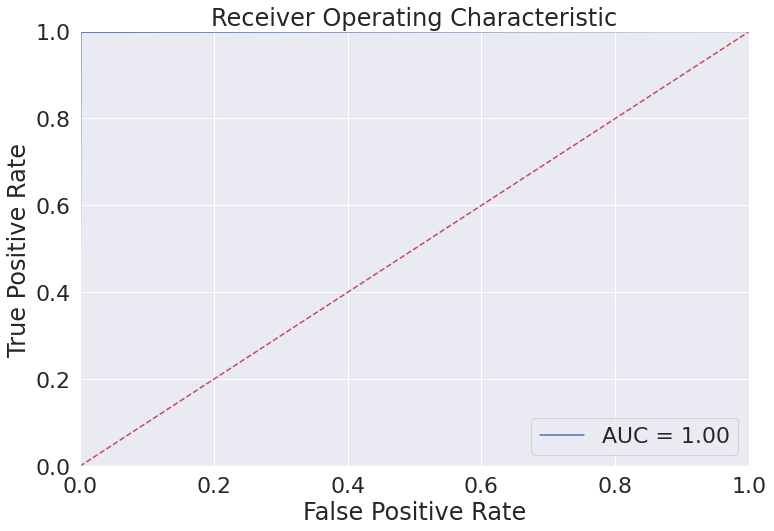

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [34]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((18358, 115), (18358, 115), (97123, 115), (110301, 115))

In [35]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [36]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((18358,), (18358,), (97123,), (110301,))

In [37]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [38]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [39]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

              precision    recall  f1-score   support

           0      0.931     0.998     0.963      3934
           1      1.000     0.997     0.998     93189

    accuracy                          0.997     97123
   macro avg      0.965     0.997     0.981     97123
weighted avg      0.997     0.997     0.997     97123



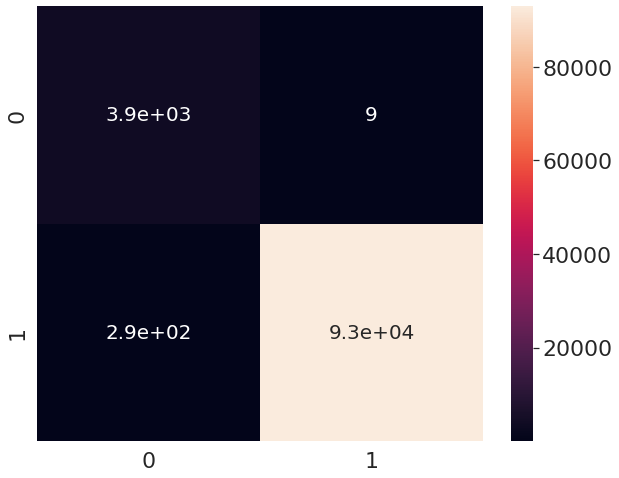

AUC score:  0.9972894175632258


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


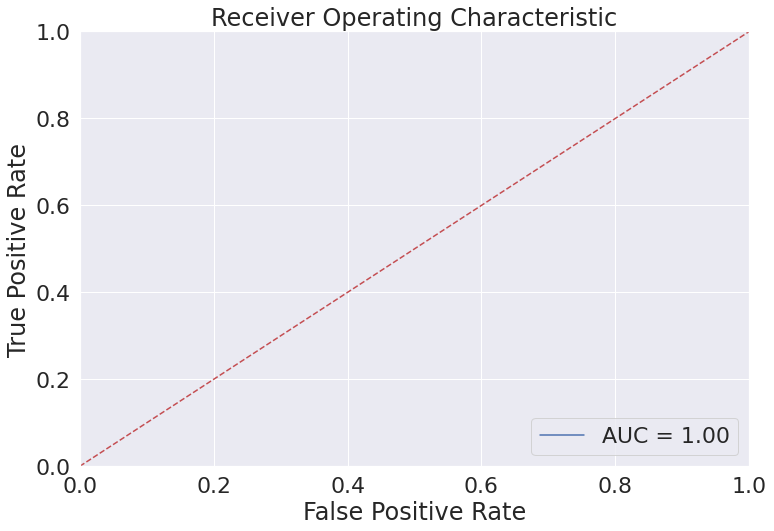

In [40]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

              precision    recall  f1-score   support

           0      0.053     0.999     0.100      2723
           1      1.000     0.544     0.705    107578

    accuracy                          0.555    110301
   macro avg      0.526     0.771     0.402    110301
weighted avg      0.977     0.555     0.690    110301



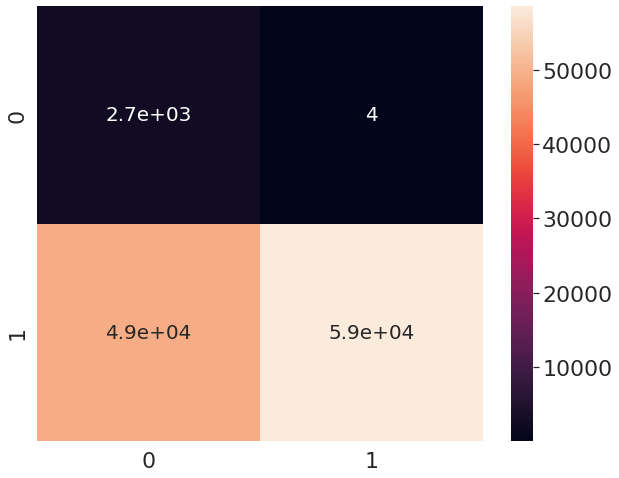

AUC score:  0.7713332249861636


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


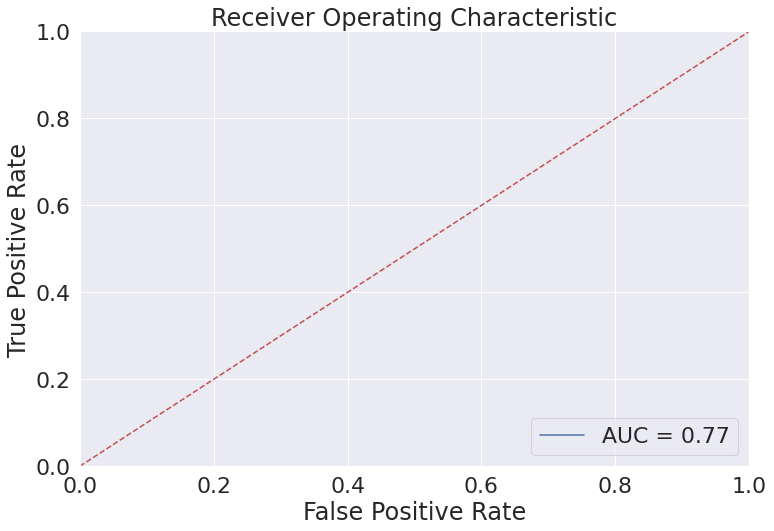

In [41]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [42]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

              precision    recall  f1-score   support

           0      0.058     0.992     0.110      3934
           1      0.999     0.323     0.488     93189

    accuracy                          0.350     97123
   macro avg      0.529     0.657     0.299     97123
weighted avg      0.961     0.350     0.472     97123



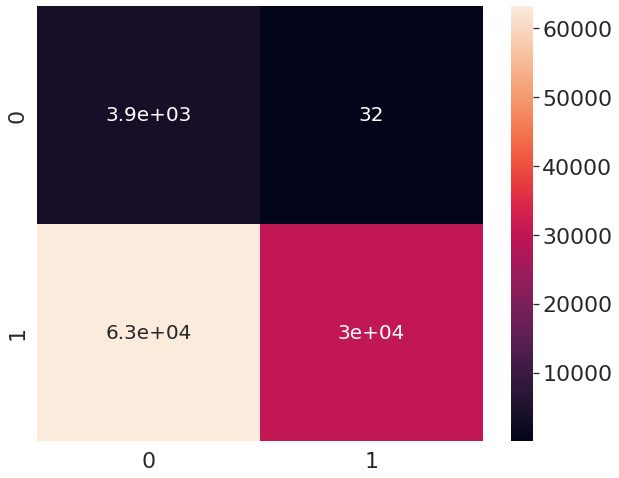

AUC score:  0.6572019266288964


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


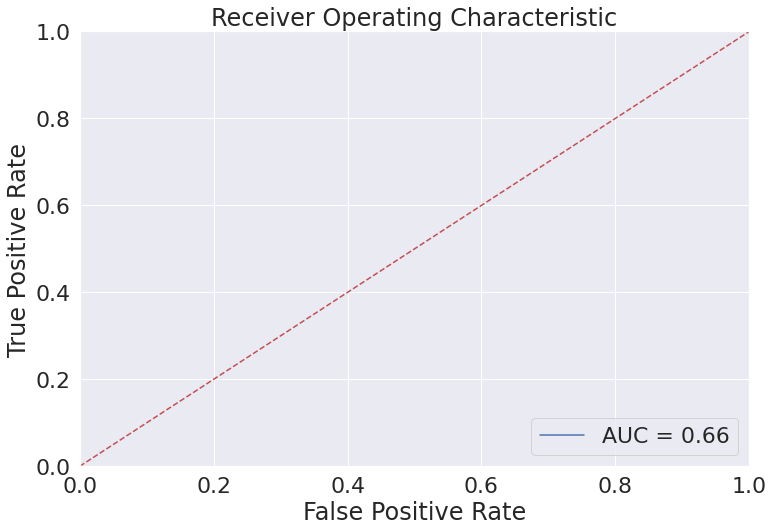

In [43]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.670     0.991     0.799      2723
           1      1.000     0.988     0.994    107578

    accuracy                          0.988    110301
   macro avg      0.835     0.989     0.897    110301
weighted avg      0.992     0.988     0.989    110301



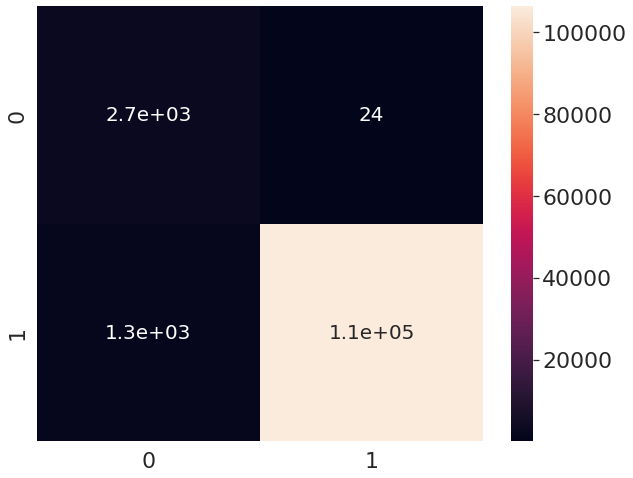

AUC score:  0.9894115345644006


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


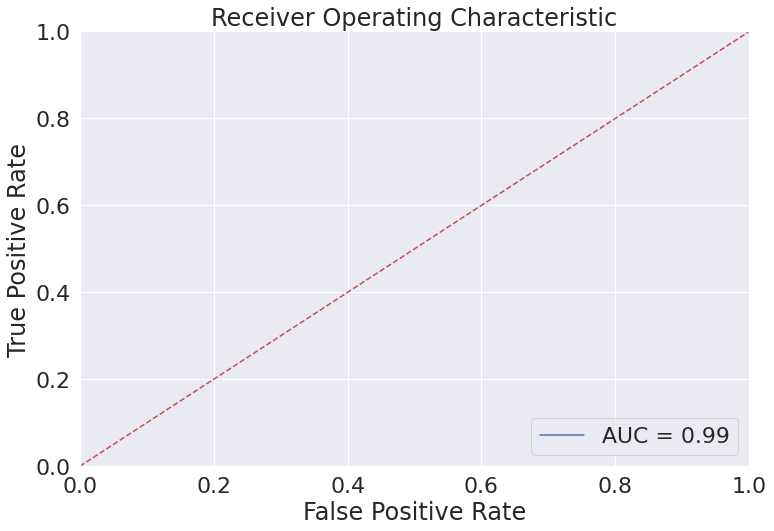

In [44]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [45]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

              precision    recall  f1-score   support

           0      0.043     0.999     0.082      3934
           1      1.000     0.057     0.107     93189

    accuracy                          0.095     97123
   macro avg      0.521     0.528     0.095     97123
weighted avg      0.961     0.095     0.106     97123



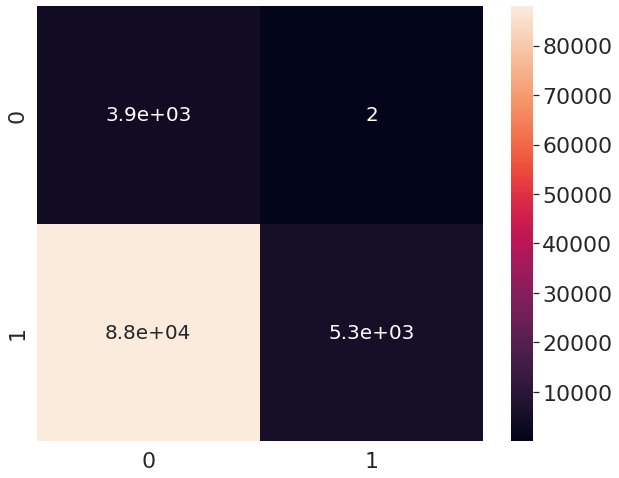

AUC score:  0.5280377715855816


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


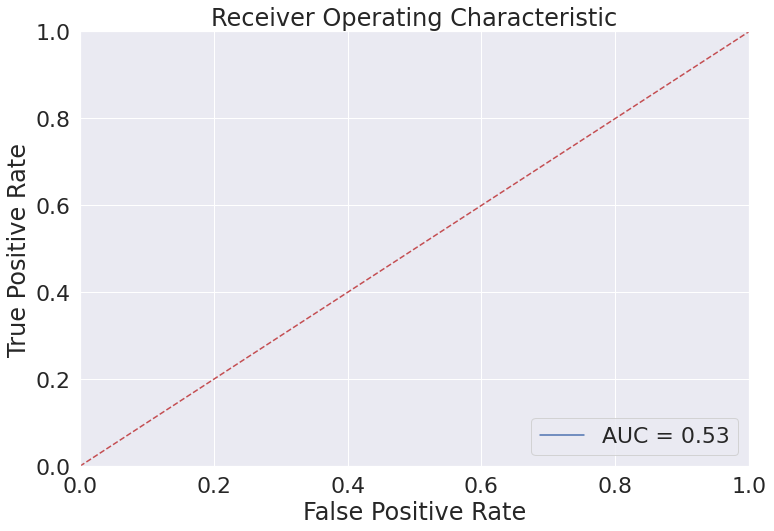

In [46]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.025     1.000     0.048      2723
           1      1.000     0.000     0.000    107578

    accuracy                          0.025    110301
   macro avg      0.512     0.500     0.024    110301
weighted avg      0.976     0.025     0.001    110301



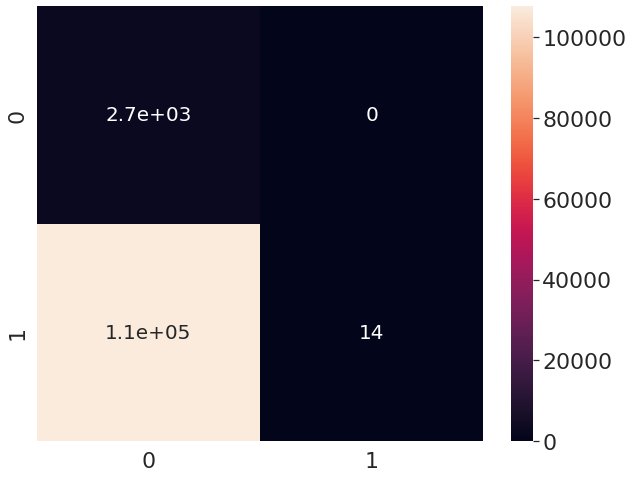

AUC score:  0.500065069066166


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


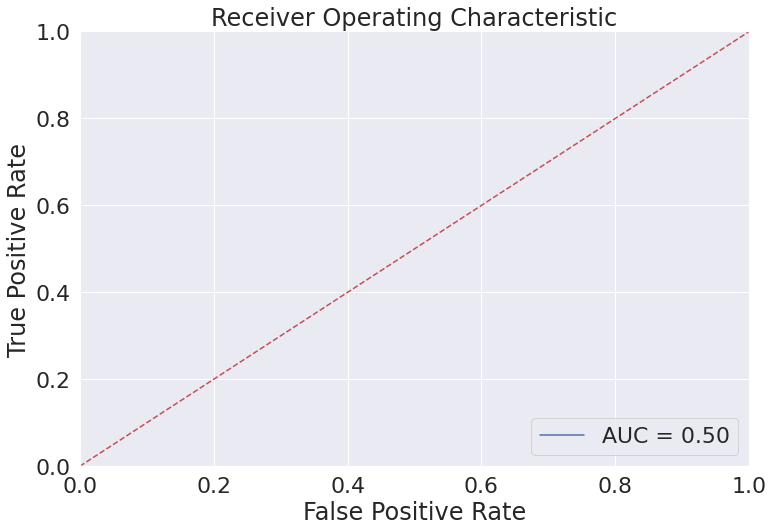

In [47]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [48]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

              precision    recall  f1-score   support

           0      0.041     1.000     0.078      3934
           1      1.000     0.000     0.000     93189

    accuracy                          0.041     97123
   macro avg      0.520     0.500     0.039     97123
weighted avg      0.961     0.041     0.003     97123



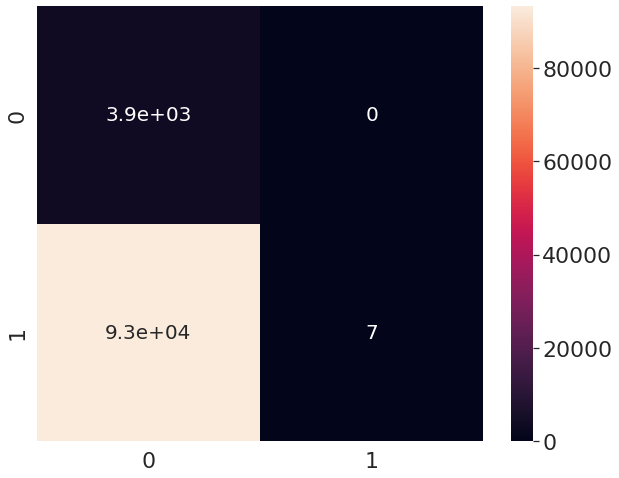

AUC score:  0.5000375580808893


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


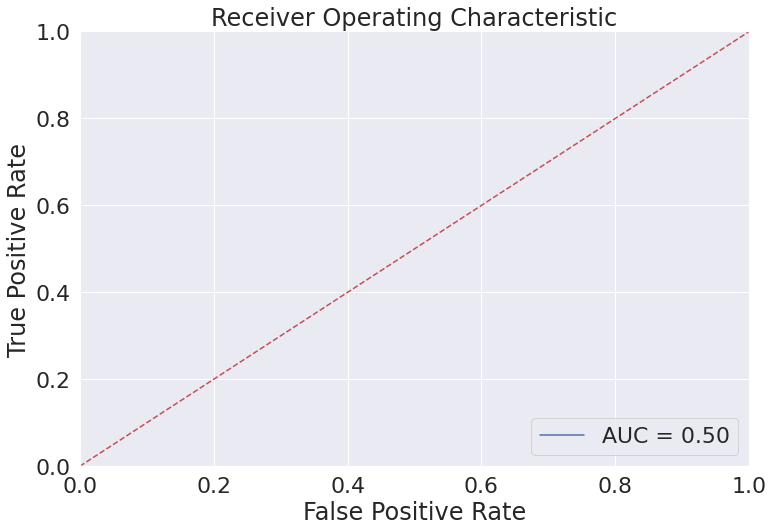

In [49]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.025     1.000     0.048      2723
           1      1.000     0.001     0.002    107578

    accuracy                          0.026    110301
   macro avg      0.512     0.501     0.025    110301
weighted avg      0.976     0.026     0.003    110301



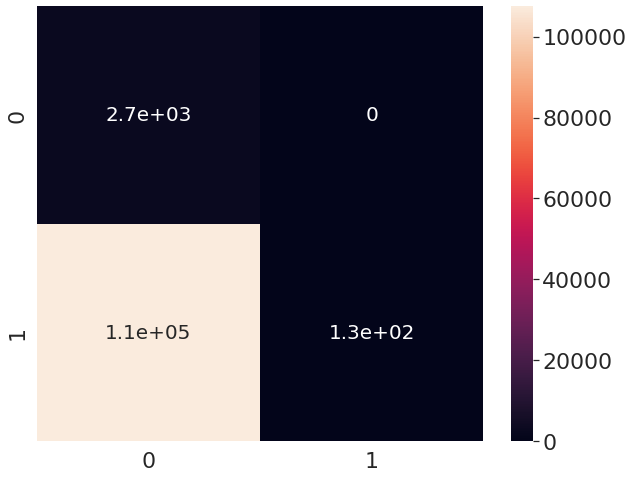

AUC score:  0.5005856215954935


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


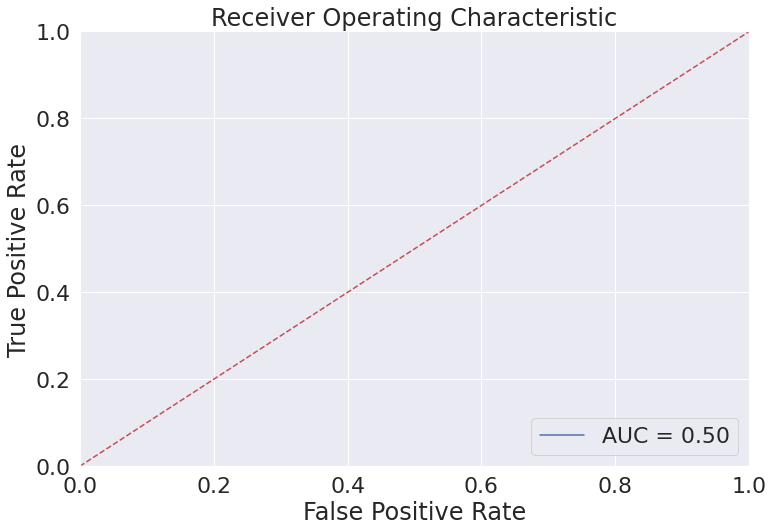

In [50]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [51]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0      0.041     1.000     0.078      3934
           1      0.000     0.000     0.000     93189

    accuracy                          0.041     97123
   macro avg      0.020     0.500     0.039     97123
weighted avg      0.002     0.041     0.003     97123



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


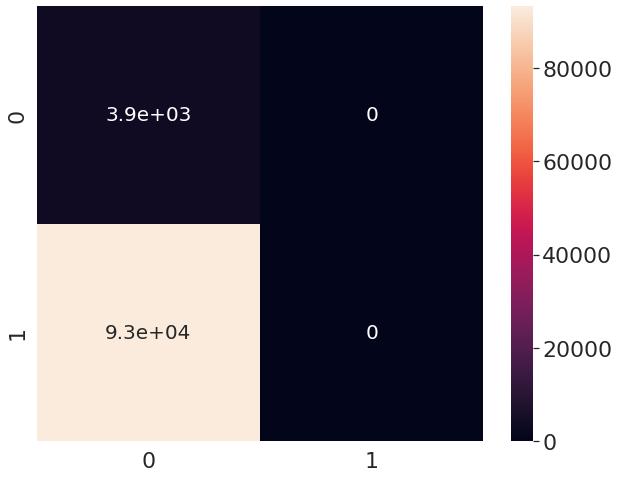

In [52]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.025     1.000     0.048      2723
           1      0.000     0.000     0.000    107578

    accuracy                          0.025    110301
   macro avg      0.012     0.500     0.024    110301
weighted avg      0.001     0.025     0.001    110301



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


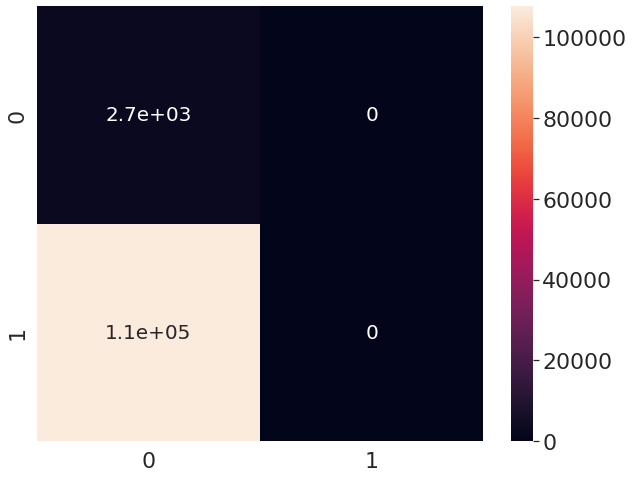

In [53]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [54]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.041     1.000     0.078      3934
           1      0.000     0.000     0.000     93189

    accuracy                          0.041     97123
   macro avg      0.020     0.500     0.039     97123
weighted avg      0.002     0.041     0.003     97123



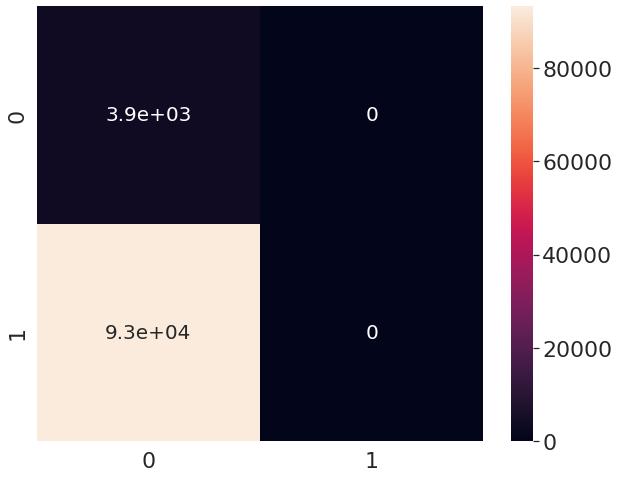

In [55]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.025     1.000     0.048      2723
           1      0.000     0.000     0.000    107578

    accuracy                          0.025    110301
   macro avg      0.012     0.500     0.024    110301
weighted avg      0.001     0.025     0.001    110301



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


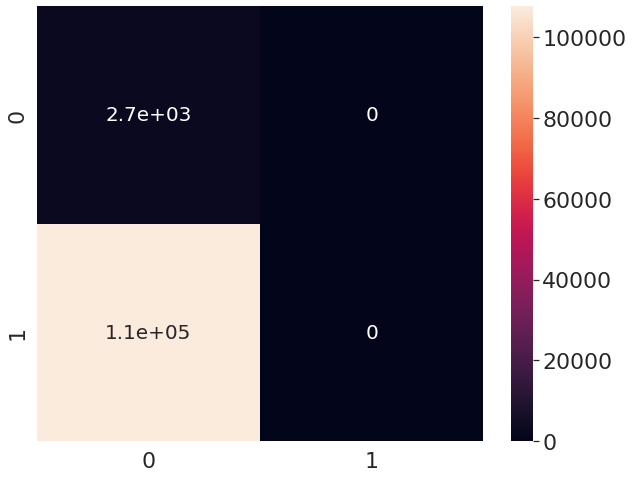

In [56]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [57]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

              precision    recall  f1-score   support

           0      0.986     0.999     0.993      3934
           1      1.000     0.999     1.000     93189

    accuracy                          0.999     97123
   macro avg      0.993     0.999     0.996     97123
weighted avg      0.999     0.999     0.999     97123



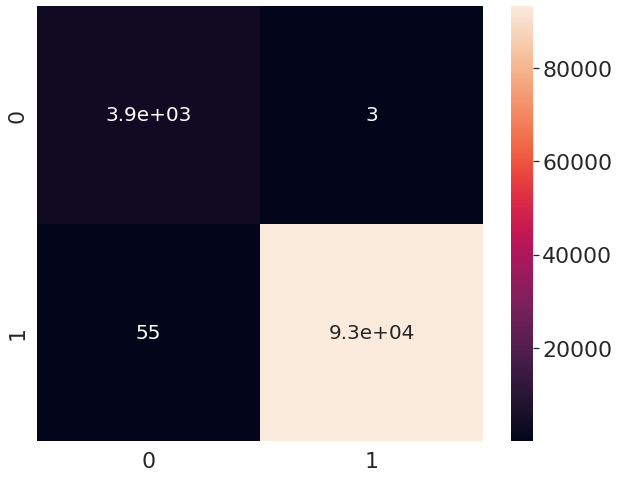

AUC score:  9.993236094864538e-01


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


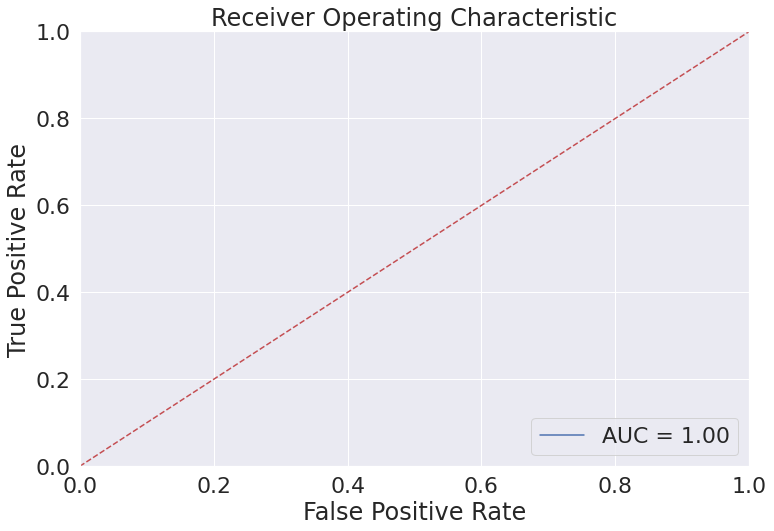

In [58]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.035     1.000     0.068      2723
           1      1.000     0.312     0.475    107578

    accuracy                          0.329    110301
   macro avg      0.518     0.656     0.272    110301
weighted avg      0.976     0.329     0.465    110301



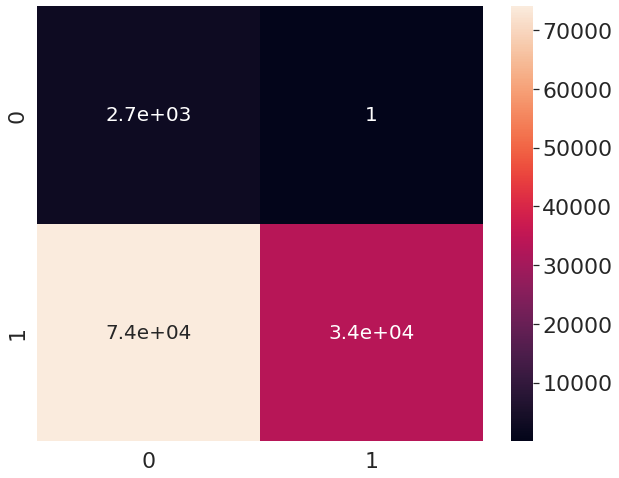

AUC score:  0.6557172137369199


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


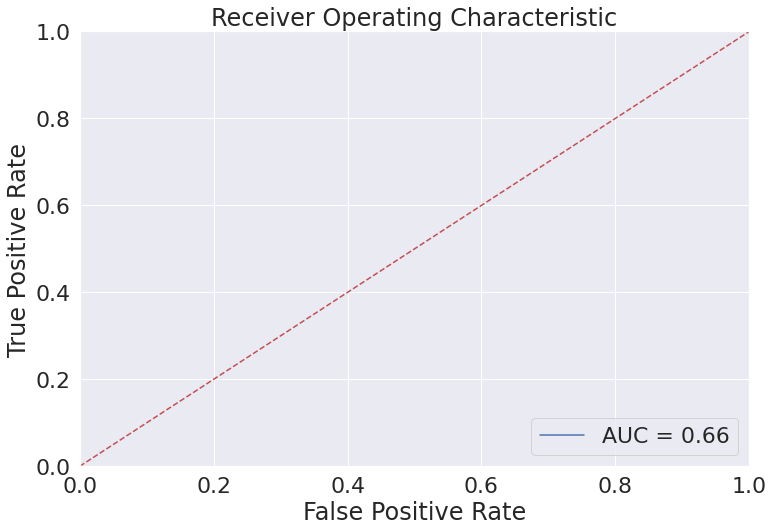

In [59]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [60]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

              precision    recall  f1-score   support

           0      0.062     1.000     0.116      3934
           1      1.000     0.357     0.526     93189

    accuracy                          0.383     97123
   macro avg      0.531     0.678     0.321     97123
weighted avg      0.962     0.383     0.509     97123



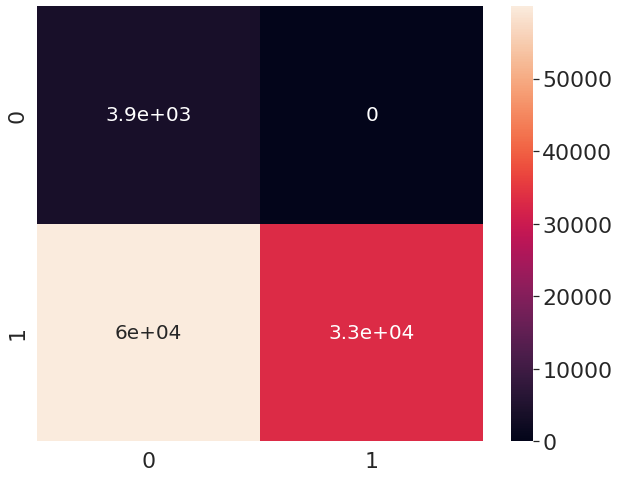

AUC score:  0.6782774791016107


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


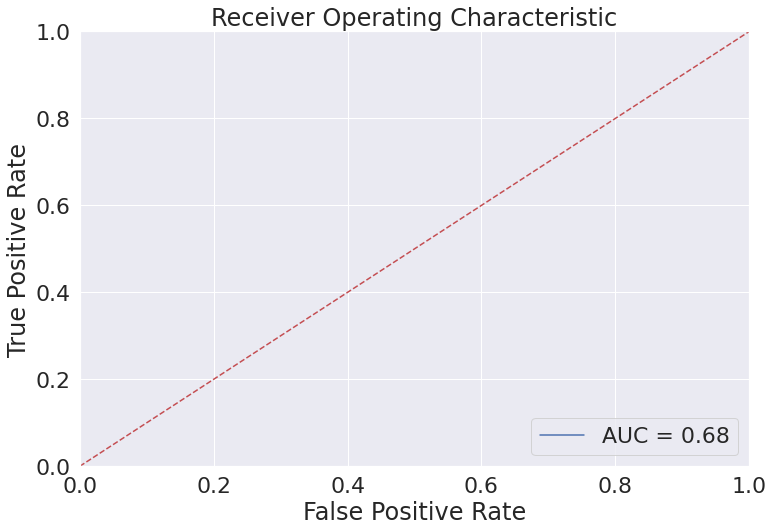

In [61]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.995     1.000     0.997      2723
           1      1.000     1.000     1.000    107578

    accuracy                          1.000    110301
   macro avg      0.997     1.000     0.999    110301
weighted avg      1.000     1.000     1.000    110301



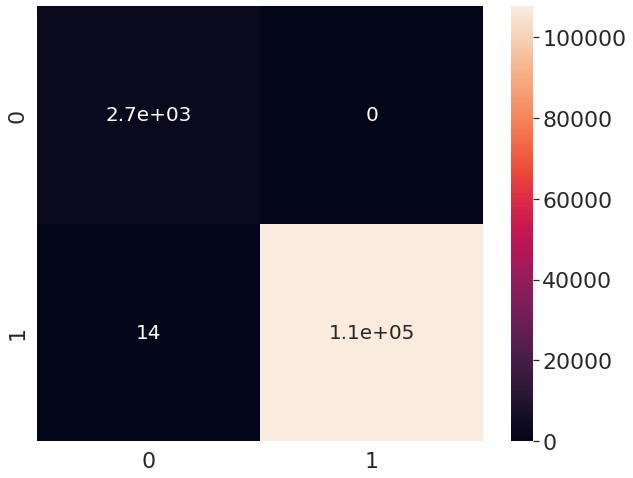

AUC score:  0.9999349309338341


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


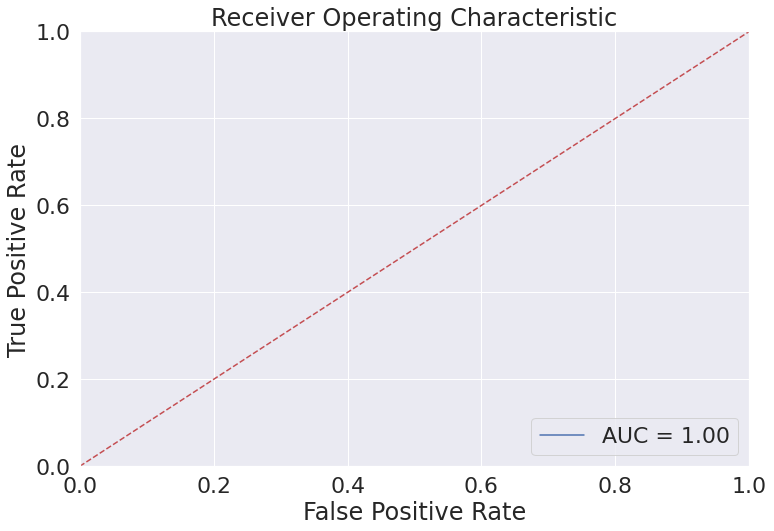

In [62]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [63]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

              precision    recall  f1-score   support

           0      0.997     1.000     0.998      3934
           1      1.000     1.000     1.000     93189

    accuracy                          1.000     97123
   macro avg      0.998     1.000     0.999     97123
weighted avg      1.000     1.000     1.000     97123



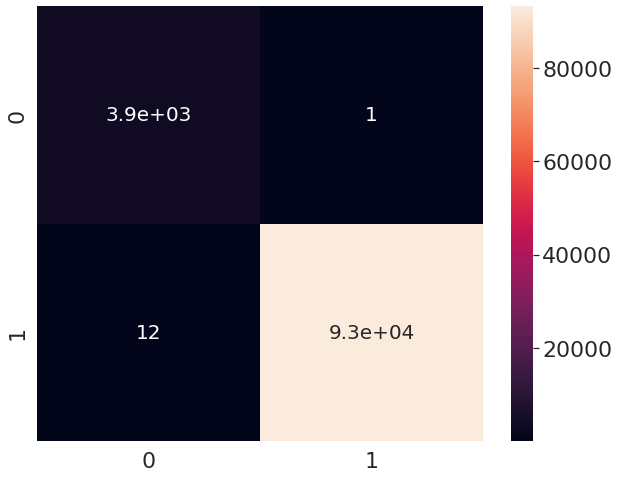

AUC score:  0.9998085176162893


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


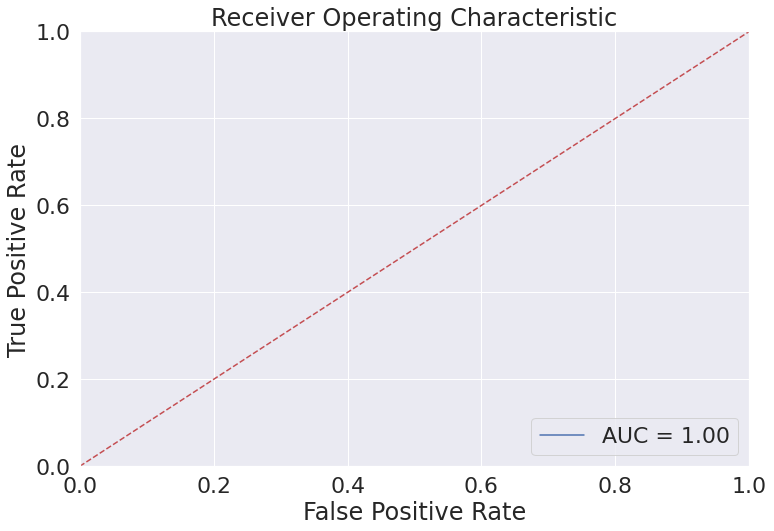

In [64]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.993     1.000     0.996      2723
           1      1.000     1.000     1.000    107578

    accuracy                          1.000    110301
   macro avg      0.996     1.000     0.998    110301
weighted avg      1.000     1.000     1.000    110301



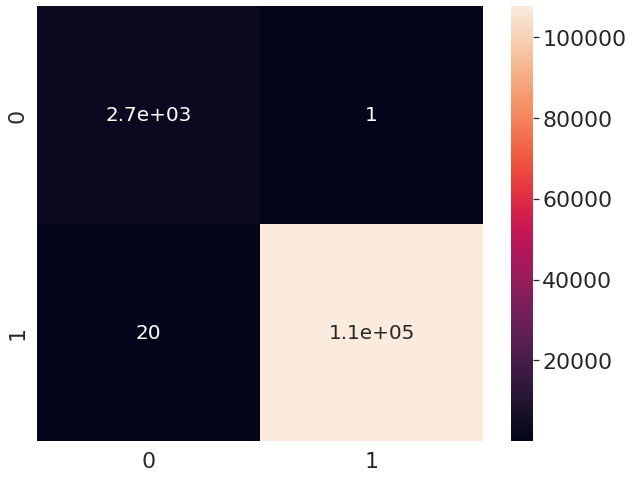

AUC score:  0.9997234231849483


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


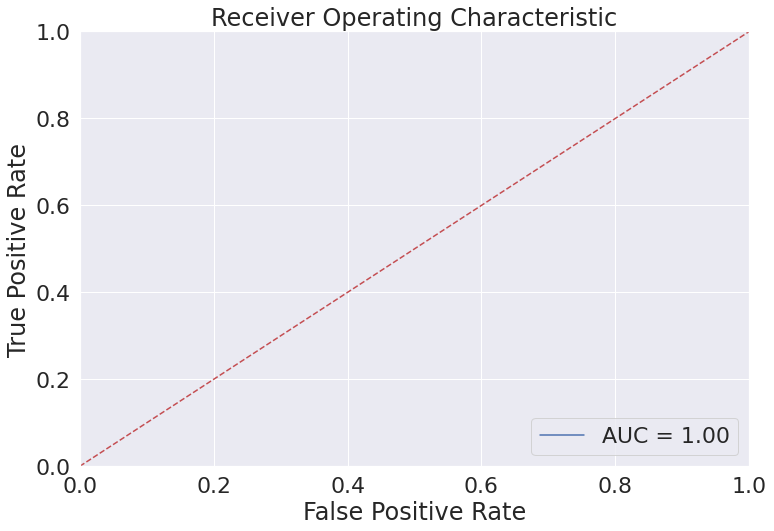

In [65]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [66]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

              precision    recall  f1-score   support

           0      0.062     1.000     0.116      3934
           1      1.000     0.359     0.528     93189

    accuracy                          0.385     97123
   macro avg      0.531     0.680     0.322     97123
weighted avg      0.962     0.385     0.512     97123



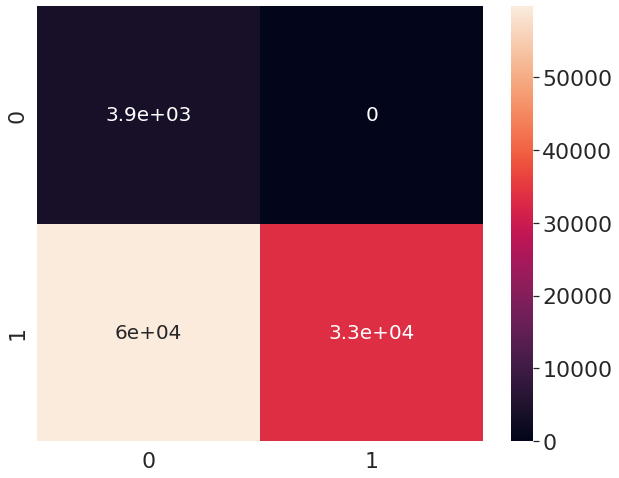

AUC score:  0.6795544538518494


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


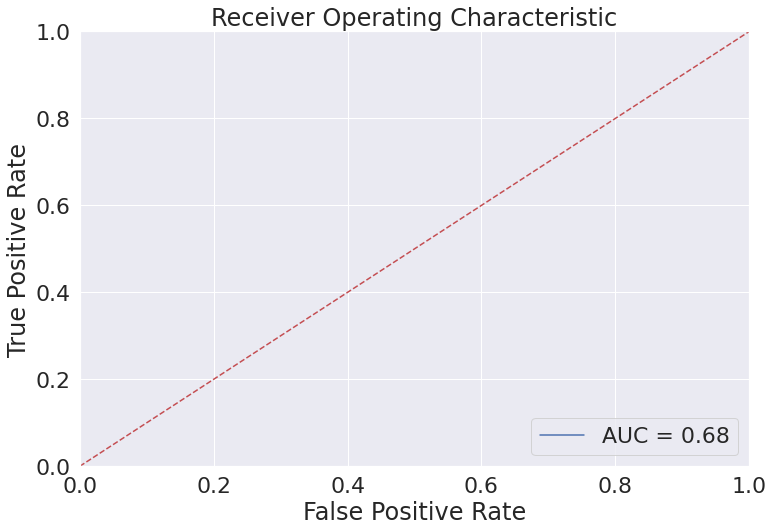

In [67]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.995     1.000     0.998      2723
           1      1.000     1.000     1.000    107578

    accuracy                          1.000    110301
   macro avg      0.998     1.000     0.999    110301
weighted avg      1.000     1.000     1.000    110301



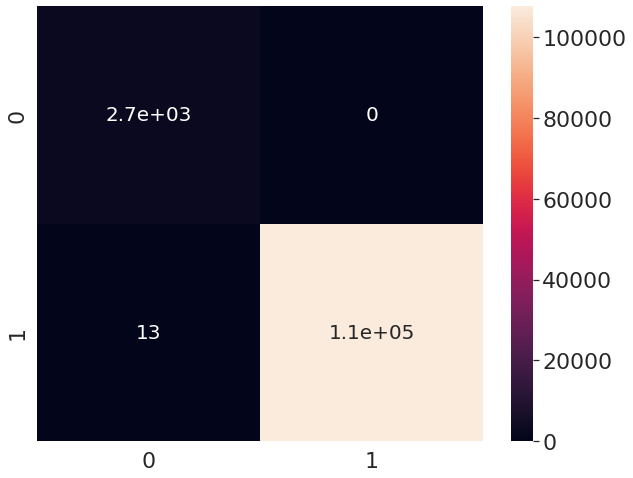

AUC score:  0.9999395787242744


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


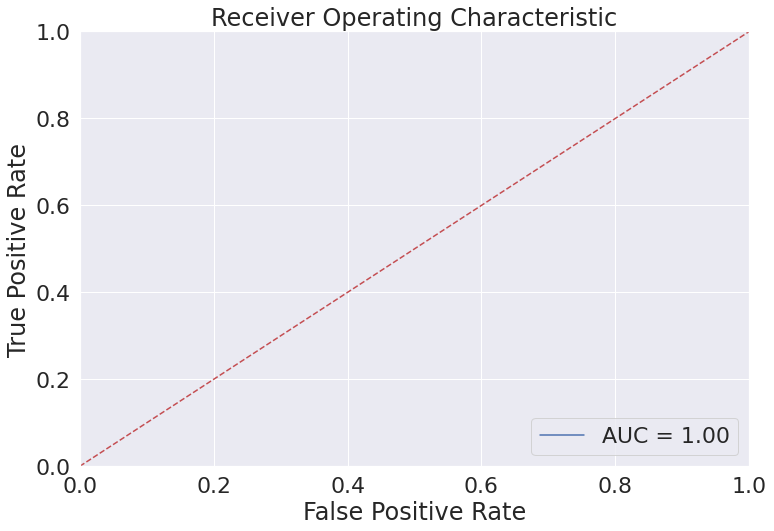

In [68]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [69]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

              precision    recall  f1-score   support

           0      0.989     1.000     0.995      3934
           1      1.000     1.000     1.000     93189

    accuracy                          1.000     97123
   macro avg      0.995     1.000     0.997     97123
weighted avg      1.000     1.000     1.000     97123



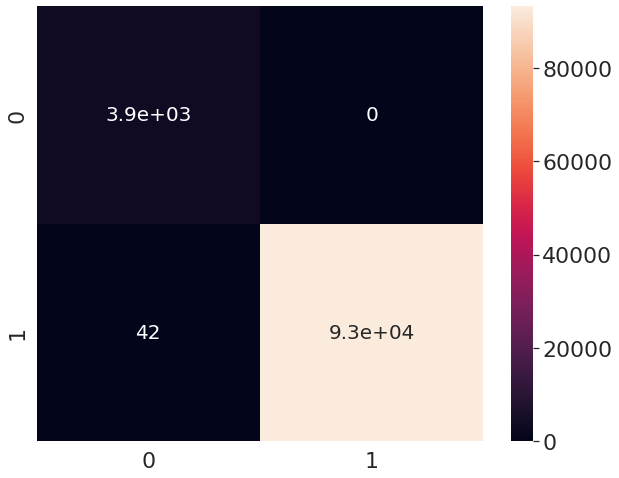

AUC score:  0.9997746515146637


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


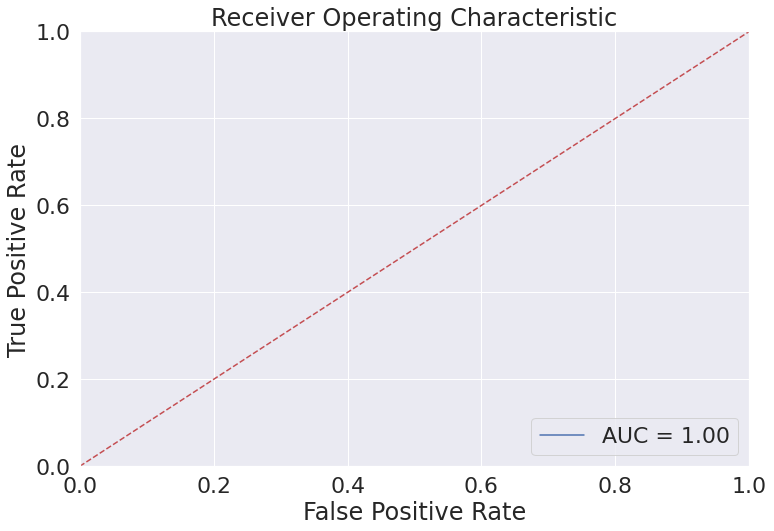

In [70]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.566     1.000     0.723      2723
           1      1.000     0.981     0.990    107578

    accuracy                          0.981    110301
   macro avg      0.783     0.990     0.857    110301
weighted avg      0.989     0.981     0.984    110301



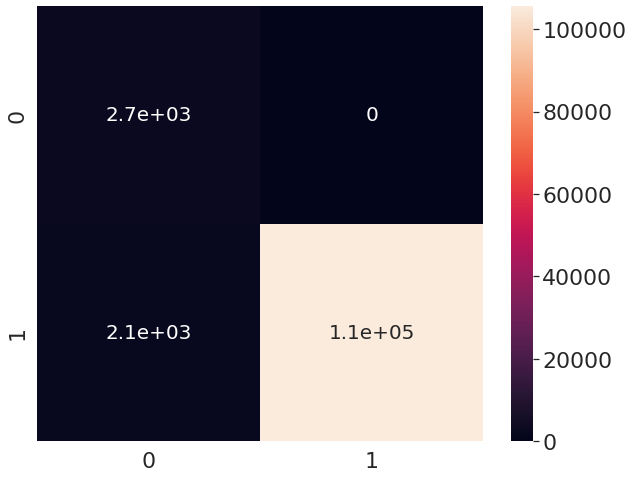

AUC score:  0.9903000613508338


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


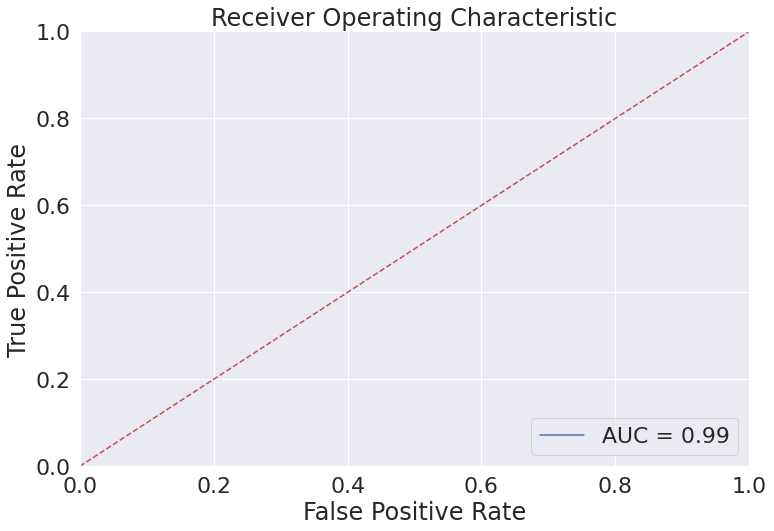

In [71]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [72]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

              precision    recall  f1-score   support

           0      0.061     1.000     0.116      3934
           1      1.000     0.356     0.525     93189

    accuracy                          0.382     97123
   macro avg      0.531     0.678     0.320     97123
weighted avg      0.962     0.382     0.508     97123



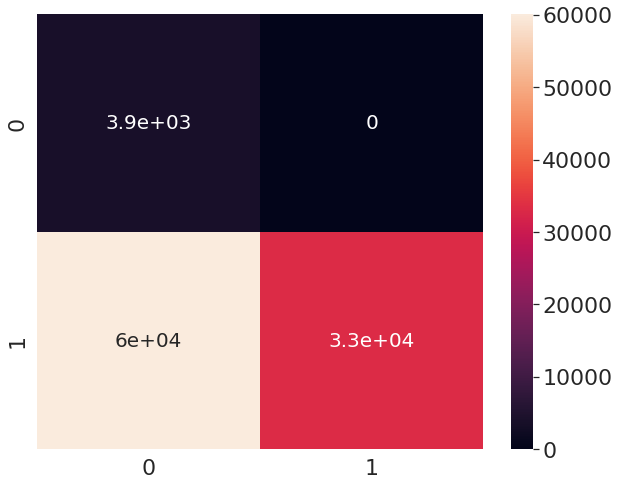

AUC score:  0.6778804365322088


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


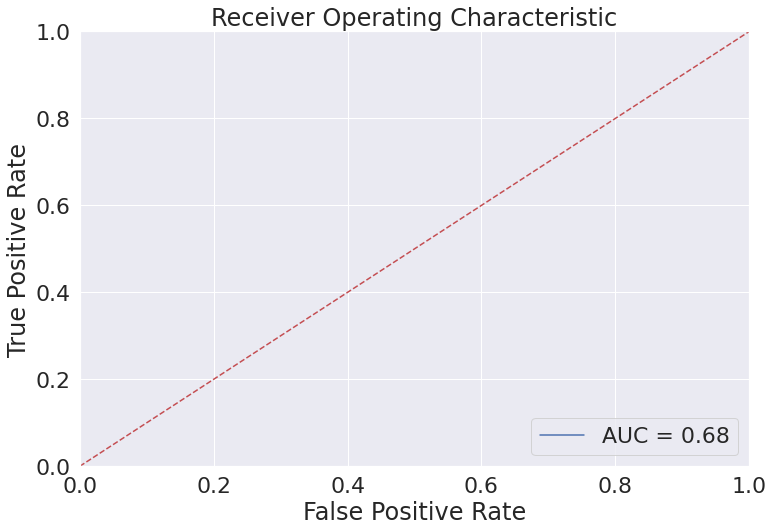

In [73]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

              precision    recall  f1-score   support

           0      0.996     1.000     0.998      2723
           1      1.000     1.000     1.000    107578

    accuracy                          1.000    110301
   macro avg      0.998     1.000     0.999    110301
weighted avg      1.000     1.000     1.000    110301



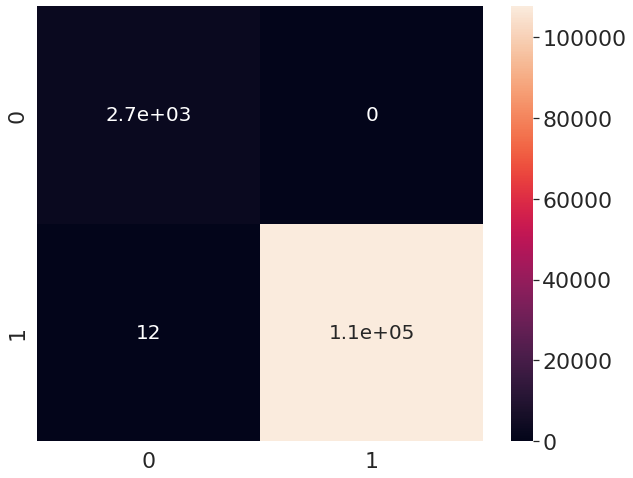

AUC score:  0.9999442265147149


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


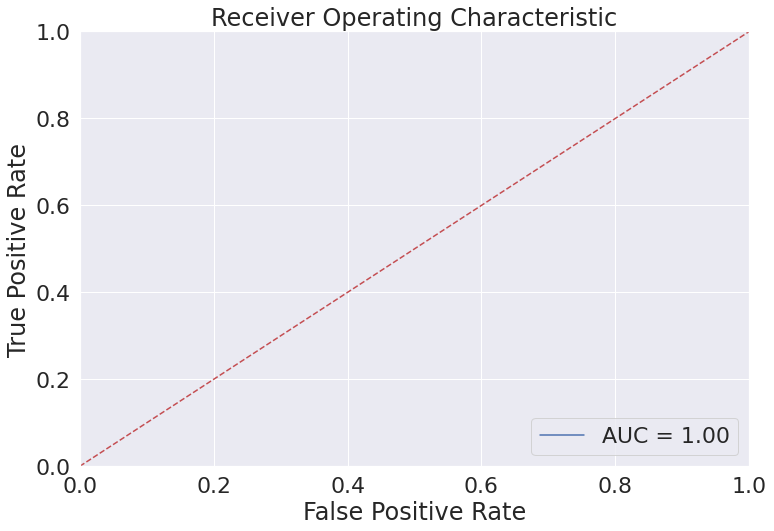

In [74]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)